# Package Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

# Data Import

In [2]:
df_pre = pd.read_csv("Sommerhus22/Sommerhus22_data.csv", sep=";")

## Datasortering/Forberedelse

In [3]:
def counter(arr,count_check):
    """
    En funktion der tæller hvor mange gange et bestemt element (count_check) 
    forekommer i et array (arr).
    """
    count_amo = 0
    for i in range(len(arr)):
        if arr[i] == count_check:
            count_amo += 1
    
    return count_amo


def melding_format(df):
    """
    Returnerer et array som sorterer meldingerne ind i to arrays:
    En som indholder meldingen, og en som indeholder udfaldet af meldingen.

    Fx hvis man i første indgang har "9g" og i den anden "-2", betyder det man har meldt
    9 gode, og efterfølgende tabte med 2 stik.

    OBS: Ved hhv Sol og Ren sol indikerer 0.1 og -0.1 (numerisk værdi valgt af praktiske årsager) 
    om spilleren med den givne melding enten vandt eller tabte runden.
    
    """

    arr = df["Melding"]

    mel1 = np.zeros_like(arr)
    mel2 = np.zeros_like(arr)

    count = 0

    for melding in arr:
        mel_split = melding.split(",")

        mel1[count] = mel_split[0]

        if len(mel_split) > 1:
            if mel_split[1][-1] == "o":
                mel2[count] = int(mel_split[1][-2])
            elif mel_split[1][-1] == "u":
                mel2[count] = -int(mel_split[1][-2])
        
        elif mel1[count] == "Sol" or mel1[count] == "Rsol":
            if (df.iloc[count][1:] > 0).sum() == 3:
                mel2[count] = -0.1
            else:
                mel2[count] = 0.1

        count += 1

    return {'Melding': mel1, 'Resultat': mel2}


def remove_persons(df,persons=[]):
    """
    En funktion der fjerner en/flere spiller(e) og alle tilhørende spil den/de person(er) har deltaget i.

    OBS: Input skal være en liste, også hvis man kun ønsker at fjerne én person.
    """
    df_return = df.copy()

    for person in persons:
        df_return = df_return.loc[df[person] == 0]
        df_return = df_return.drop(columns=person)
    
    return df_return.reset_index().drop(columns="index")


### (Optional) Fjerner ønskede personer fra data.

In [4]:
persons_remove = ["Maria"] # Lad blot listen være tom hvis ingen ønskes fjernet fra data

df = remove_persons(df_pre, persons_remove)

Laver en dictionary-template som indeholder alle spillere.

In [5]:
dict_temp = {}
for person in df:
    if person != "Melding":
        dict_temp[person] = 0


Arrays der indeholder antal spil spillet pr person:

In [6]:
amo = len(df)

game_amo_pp = dict_temp.copy()

for person in game_amo_pp:
    game_amo_pp[person] = amo - counter(df[person],0)

game_amo_pp


{'David': 63, 'William': 51, 'Gustav': 65, 'Johan': 48, 'Samuel': 48}

Dictionaries der kun indeholder spil som hver enkelte person har deltaget i

In [7]:
gamedata_clean = dict_temp.copy()

for person in gamedata_clean:
    gamedata_clean[person] = df[person].loc[df[person]!=0]

# Statisikker

Først og fremmest ser vi lige på den endelige pointsum.

In [8]:
points_tot = dict_temp.copy()

for person in points_tot:
    points_tot[person] = round(df[person].sum(),2)

points_tot

{'David': 11.6,
 'William': -6.12,
 'Gustav': -2.37,
 'Johan': 2.18,
 'Samuel': -5.0}

### Winning Streaks

In [9]:
def win_str_count(df):
    """
    En funktion der tæller hvor mange antal spil en given person har vundet i træk
    """

    max_win = 0
    count = 0

    for game_score in df:
        if game_score > 0:
            count += 1
        else:
            max_win = max(max_win,count)
            count = 0
    
    max_win = max(max_win,count)

    return max_win

Højeste winningstreak taget forbehold pauser mellem spil (dvs forekommer der spil hvor man ikke har deltaget, så resettes streaken)

In [10]:
dict_winstr_nop = dict_temp.copy()

for person in dict_winstr_nop:
    dict_winstr_nop[person] = win_str_count(df[person])

dict_winstr_nop

{'David': 7, 'William': 8, 'Gustav': 5, 'Johan': 4, 'Samuel': 3}

Højeste winningstreak uden forbehold for pauser mellem spil (Nu ignorerers pauser mellem spil, dvs hvis man vinder et spil, sider over et par spil, og så vinder næste gang man spiller igen, så fortsætter streaken).

In [11]:
dict_winstr_incp = dict_temp.copy()

for person in dict_winstr_incp:
    dict_winstr_incp[person] = win_str_count(gamedata_clean[person])

dict_winstr_incp

{'David': 7, 'William': 8, 'Gustav': 5, 'Johan': 4, 'Samuel': 3}

### Statistikker over Point

In [12]:
avg = dict_temp.copy()
medians = dict_temp.copy()
stds = dict_temp.copy()
mins = dict_temp.copy()
maxs = dict_temp.copy()

for person in gamedata_clean:
    medians[person] = round(np.median(gamedata_clean[person]),2)
    avg[person] = round(np.average(gamedata_clean[person]),2)
    stds[person] = round(np.std(gamedata_clean[person]),2)
    mins[person] = np.min(gamedata_clean[person])
    maxs[person] = np.max(gamedata_clean[person])

Gennemsnitscore

In [13]:
avg

{'David': 0.18,
 'William': -0.12,
 'Gustav': -0.04,
 'Johan': 0.05,
 'Samuel': -0.1}

Medianscore

In [14]:
medians

{'David': 0.2, 'William': -0.1, 'Gustav': 0.2, 'Johan': 0.2, 'Samuel': -0.2}

Spredning af point

In [15]:
stds

{'David': 0.97, 'William': 1.11, 'Gustav': 1.0, 'Johan': 0.99, 'Samuel': 0.94}

Laveste score

In [16]:
mins

{'David': -1.6, 'William': -3.0, 'Gustav': -3.2, 'Johan': -3.2, 'Samuel': -2.4}

Højeste score

In [17]:
maxs

{'David': 3.2, 'William': 3.2, 'Gustav': 2.4, 'Johan': 2.4, 'Samuel': 2.7}

Boxplots

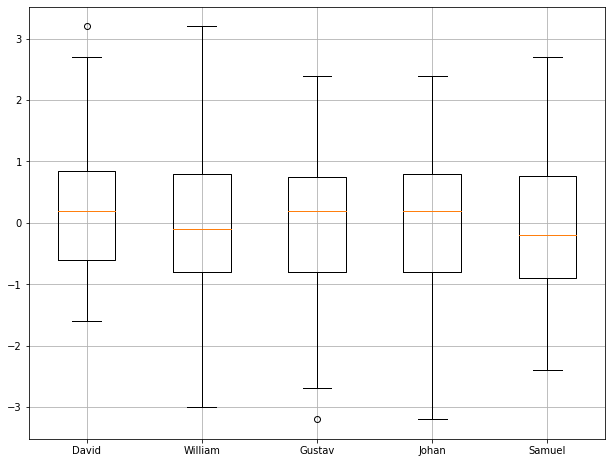

In [18]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
ax.boxplot(gamedata_clean.values())
ax.set_xticklabels(gamedata_clean.keys())
plt.grid()
plt.show()

Antal vundne spil pr person

In [19]:
wins_tot = dict_temp.copy()
loss_tot = dict_temp.copy()
wins_tot_rel  = dict_temp.copy()

for person in wins_tot:
    wins_tot[person] = (gamedata_clean[person] > 0).sum()
    loss_tot[person] = (gamedata_clean[person] < 0).sum()
    wins_tot_rel[person] = round(wins_tot[person]/game_amo_pp[person],2)

wins_tot

{'David': 35, 'William': 25, 'Gustav': 35, 'Johan': 28, 'Samuel': 22}

Antal tabte spil pr person

In [20]:
loss_tot

{'David': 28, 'William': 26, 'Gustav': 30, 'Johan': 20, 'Samuel': 26}

Antal vundne spil relativ til samlet antal spil pr person

In [21]:
wins_tot_rel

{'David': 0.56, 'William': 0.49, 'Gustav': 0.54, 'Johan': 0.58, 'Samuel': 0.46}

### Statistikker over meldinger

In [22]:
meldinger = melding_format(df)

Antal forekomster af hver melding:

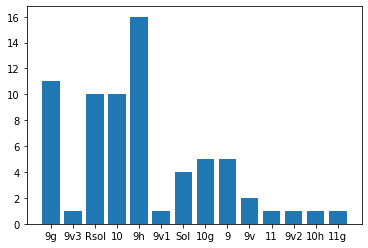

In [23]:
meldinger_count = collections.Counter(meldinger["Melding"])

plt.bar(*zip(*meldinger_count.items()))
plt.show()

Antal vundne spil, hvor man har fået flere stik end meldt

In [24]:
wins_op = dict_temp.copy()

count = 0
for udfald in meldinger["Resultat"]:
    if udfald > 0.1:
        for person in wins_op:
            if df.iloc[count][person] > 0:
                wins_op[person] += 1

    count += 1

wins_op

{'David': 20, 'William': 10, 'Gustav': 14, 'Johan': 7, 'Samuel': 11}

Antal vundne spil, hvor man har fået flere stik end meldt, relativt til hvor mange spil man har spillet i alt

In [25]:
wins_op_rel = dict_temp.copy()

for person in wins_op_rel:
    wins_op_rel[person] = round(wins_op[person]/game_amo_pp[person],2)

wins_op_rel

{'David': 0.32, 'William': 0.2, 'Gustav': 0.22, 'Johan': 0.15, 'Samuel': 0.23}

## Par-statistikker

Først laves en template dictionary som indeholder makkerparkombinationer

In [26]:
pairs_temp = {}

for p1 in dict_temp:
    for p2 in dict_temp:
        pairs_temp[p1,p2] = 0

### Samlede antal spil

Antal spil som hver personkombination har deltaget i sammen (dvs inkl som både makker og modstander)

In [27]:
game_amo_pairs = pairs_temp.copy()

for i in range(amo):
    for p1, p2 in game_amo_pairs:
        if df.iloc[i][p1] != 0 and df.iloc[i][p2] != 0:
            game_amo_pairs[p1,p2] += 1


game_amo_pairs_df = pd.DataFrame(game_amo_pairs.values(), index=pd.MultiIndex.from_tuples(game_amo_pairs.keys())).unstack(1)
game_amo_pairs_df

0                            
        David Gustav Johan Samuel William
David      63     60    42     42      45
Gustav     60     65    44     44      47
Johan      42     44    48     27      30
Samuel     42     44    27     48      30
William    45     47    30     30      51

Antal spil spillet i hver makkerparkombination, incl sol og ren sol

In [28]:
makre_amo_pairs = pairs_temp.copy()

for i in range(amo):
    for p1, p2 in makre_amo_pairs:
        if df.iloc[i][p1] > 0 and df.iloc[i][p2] > 0:
            makre_amo_pairs[p1,p2] += 1
        elif df.iloc[i][p1] < 0 and df.iloc[i][p2] < 0:
            makre_amo_pairs[p1,p2] += 1


makre_amo_pairs_df = pd.DataFrame(makre_amo_pairs.values(), index=pd.MultiIndex.from_tuples(makre_amo_pairs.keys())).unstack(1)
makre_amo_pairs_df

0                            
        David Gustav Johan Samuel William
David      63     14    16     14      21
Gustav     14     65    22     18      14
Johan      16     22    48     10      12
Samuel     14     18    10     48      13
William    21     14    12     13      51

Antal spil spillet i hver makkerparkombination, eskl sol og ren sol

In [29]:
makre_amo_pairs_nosol = pairs_temp.copy()

for i in range(amo):
    if df.iloc[i]["Melding"] != "Sol" and df.iloc[i]["Melding"] != "Rsol":
        for p1, p2 in makre_amo_pairs_nosol:
            if df.iloc[i][p1] > 0 and df.iloc[i][p2] > 0:
                makre_amo_pairs_nosol[p1,p2] += 1
            elif df.iloc[i][p1] < 0 and df.iloc[i][p2] < 0:
                makre_amo_pairs_nosol[p1,p2] += 1
                    

makre_amo_pairs_nosol_df = pd.DataFrame(makre_amo_pairs_nosol.values(), index=pd.MultiIndex.from_tuples(makre_amo_pairs_nosol.keys())).unstack(1)
makre_amo_pairs_nosol_df

0                            
        David Gustav Johan Samuel William
David      50     13    11     10      17
Gustav     13     51    17     13       9
Johan      11     17    39      6       8
Samuel     10     13     6     37       8
William    17      9     8      8      42

Antal spil spillet i hver makkerparkombination, incl sol og ren sol, korrigeret (divideret) med antal spil parret har deltaget i sammen. Dvs man får hvor ofte (i procent) to spillere har været makre over alle de spil som begge personer har deltaget i.

In [30]:
makre_amo_pairs_corr = pairs_temp.copy()

for p1,p2 in makre_amo_pairs_corr:
    if game_amo_pairs[p1,p2] != 0:
        makre_amo_pairs_corr[p1,p2] = makre_amo_pairs[p1,p2]/game_amo_pairs[p1,p2]

makre_amo_pairs_corr_df = pd.DataFrame(makre_amo_pairs_corr.values(), index=pd.MultiIndex.from_tuples(makre_amo_pairs_corr.keys())).unstack(1)
makre_amo_pairs_corr_df.round(decimals=2)

0                            
        David Gustav Johan Samuel William
David    1.00   0.23  0.38   0.33    0.47
Gustav   0.23   1.00  0.50   0.41    0.30
Johan    0.38   0.50  1.00   0.37    0.40
Samuel   0.33   0.41  0.37   1.00    0.43
William  0.47   0.30  0.40   0.43    1.00

### Antal vundne spil

Antal vundne spil pr makkerpar

In [31]:
wins_amo_pairs = pairs_temp.copy()

for i in range(amo):
    for p1,p2 in wins_amo_pairs:
        if df.iloc[i][p1] > 0 and df.iloc[i][p2] > 0:
            wins_amo_pairs[p1,p2] += 1


wins_amo_pairs_df = pd.DataFrame(wins_amo_pairs.values(), index=pd.MultiIndex.from_tuples(wins_amo_pairs.keys())).unstack(1)
wins_amo_pairs_df

0                            
        David Gustav Johan Samuel William
David      35     10    11      6      13
Gustav     10     35    13     10       7
Johan      11     13    28      6       7
Samuel      6     10     6     22       5
William    13      7     7      5      25

Antal vundne spil pr makkerpar, korrigeret for antallet af spil som dette par har været makre i. (Dvs man får succesraten for den makkerparkombination).

In [32]:
wins_amo_pairs_corr = pairs_temp.copy()

for p1,p2 in wins_amo_pairs_corr:
    if makre_amo_pairs[p1,p2] != 0:
        wins_amo_pairs_corr[p1,p2] = wins_amo_pairs[p1,p2]/makre_amo_pairs[p1,p2]

wins_amo_pairs_corr_df = pd.DataFrame(wins_amo_pairs_corr.values(), index=pd.MultiIndex.from_tuples(wins_amo_pairs_corr.keys())).unstack(1)
wins_amo_pairs_corr_df.round(decimals=2)

0                            
        David Gustav Johan Samuel William
David    0.56   0.71  0.69   0.43    0.62
Gustav   0.71   0.54  0.59   0.56    0.50
Johan    0.69   0.59  0.58   0.60    0.58
Samuel   0.43   0.56  0.60   0.46    0.38
William  0.62   0.50  0.58   0.38    0.49

Nu vurderer vi sucessraten på samlede antal point fået sammen som makkerpar, og dermed ikke på antallet af vundne spil.

Sum af point fået i hver makkerparkombination.

In [33]:
points_pairs = pairs_temp.copy()

for i in range(amo):
    for p1, p2 in points_pairs:
        points_p1 = df.iloc[i][p1]
        points_p2 = df.iloc[i][p2]
        if points_p1 == points_p2 and points_p1 != 0:
            points_pairs[p1,p2] += points_p1
                    

points_pairs_df = pd.DataFrame(points_pairs.values(), index=pd.MultiIndex.from_tuples(points_pairs.keys())).unstack(1)
points_pairs_df.round(decimals=2)



0                            
         David Gustav Johan Samuel William
David    11.60   4.90  4.60   1.95    5.45
Gustav    4.90  -2.37 -0.67  -0.05   -2.82
Johan     4.60  -0.67  2.18  -0.55    1.33
Samuel    1.95  -0.05 -0.55  -5.00   -5.65
William   5.45  -2.82  1.33  -5.65   -6.12

Sum af point fået i hver makkerparkombination, korrigeret for antallet af spil som dette par har været makre i. (Dvs man får det gennemsnitlige antal point et makkerpar får i en runde).

In [34]:
points_pairs_corr = pairs_temp.copy()

for p1,p2 in points_pairs_corr:
    if makre_amo_pairs[p1,p2] != 0:
        points_pairs_corr[p1,p2] = points_pairs[p1,p2]/makre_amo_pairs[p1,p2]

points_pairs_corr_df = pd.DataFrame(points_pairs_corr.values(), index=pd.MultiIndex.from_tuples(points_pairs_corr.keys())).unstack(1)
points_pairs_corr_df.round(decimals=2)

0                            
        David Gustav Johan Samuel William
David    0.18   0.35  0.29   0.14    0.26
Gustav   0.35  -0.04 -0.03  -0.00   -0.20
Johan    0.29  -0.03  0.05  -0.05    0.11
Samuel   0.14  -0.00 -0.05  -0.10   -0.43
William  0.26  -0.20  0.11  -0.43   -0.12

# Idéer til statistikker

Statistik pr personn:
- Højeste winning streak
- Medianscore
- Hyppigste melding pr person
- Hvem vandt relativt flest spil, hvor de fik flere stik end meldt
- Antal spil spillet
- Antal/procent spil tabt/vundet

Statistik pr makkerpar:
- Den bedste kombination af makkerpar ifht antal vundene spil, pointscore
- Den mest hyppige kombi af makkerpar (påvis/debunk the Gutsab-Scmulduo)
